Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8614 - loss: 0.5054
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9374 - loss: 0.2509
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9431 - loss: 0.2501
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9507 - loss: 0.2105
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9528 - loss: 0.2000
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9539 - loss: 0.2019
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9586 - loss: 0.1834
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9553 - loss: 0.2083
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9494 - loss: 0.2436
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9552 - loss: 0.1950
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9596 - loss: 0.1853
Epoch 12/20
1875/18

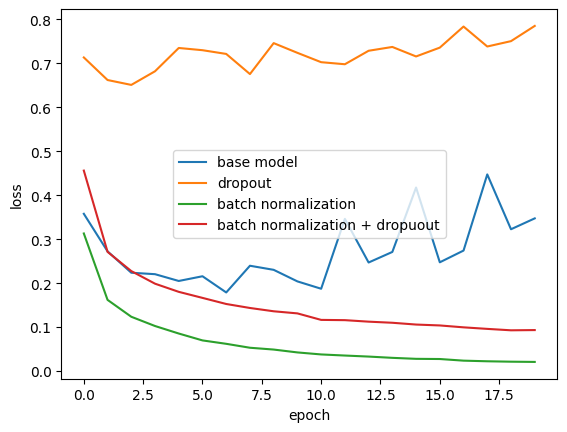

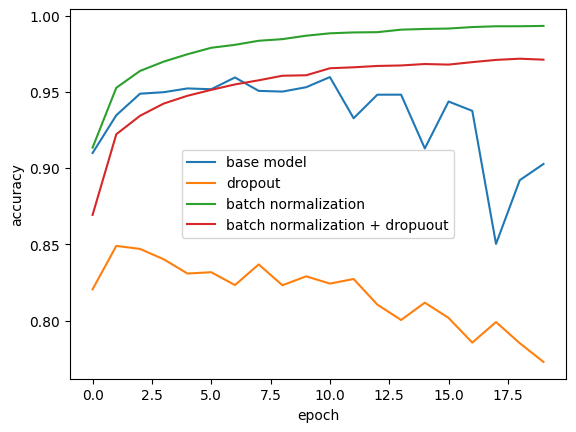

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9207 - loss: 0.6466
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8911 - loss: 0.5820
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9786 - loss: 0.0756
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0595


[0.04918350651860237, 0.9847000241279602]

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

lr = 0.01
dropout_rate = 0.2
num_node =  tf.constant([256,256,128,128])
num_epoch = 20


(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

x_train = train_x / 255.
x_test = test_x / 255.
dim_x = 28
dim_y = 28
dim_z = 1
num_class = 10


def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(dim_x,dim_y,dim_z)))
    model.add(keras.layers.Dense(num_node[0].numpy(), activation='relu'))
    model.add(keras.layers.Dense(num_node[1].numpy(), activation='relu'))
    model.add(keras.layers.Dense(num_node[2].numpy(), activation='relu'))
    model.add(keras.layers.Dense(num_node[3].numpy(), activation='relu'))
    model.add(keras.layers.Dense(num_class, activation='softmax', name='output_layer'))

    model.compile(optimizer=keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model


def create_dropout_model(dropout_rate):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(dim_x,dim_y,dim_z)))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_node[0].numpy(), activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_node[1].numpy(), activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_node[2].numpy(), activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_node[3].numpy(), activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_class, activation='softmax', name="output_layer"))

    model.compile(optimizer=keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model


def create_batchnorm_model():
    model = keras.Sequential()

    model.add(keras.layers.Flatten(input_shape=(dim_x,dim_y,dim_z)))
    model.add(keras.layers.Dense(num_node[0].numpy()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(num_node[1].numpy()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(num_node[2].numpy()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(num_node[3].numpy()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(num_class))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())

    model.compile(optimizer=keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model


def create_batchnorm_dropout_model(dropout_rate):
    model = keras.Sequential()

    model.add(keras.layers.Flatten(input_shape=(dim_x,dim_y,dim_z)))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_node[0].numpy()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_node[1].numpy()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_node[2].numpy()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_node[3].numpy()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(num_class))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())

    model.compile(optimizer=keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model



# model build and learning
model = create_model()
hist = model.fit(x_train, train_y, epochs=num_epoch)

model_dropout = create_dropout_model(dropout_rate)
hist_dropout = model_dropout.fit(x_train, train_y, epochs=num_epoch)

model_batchnorm = create_batchnorm_model()
hist_batchnorm = model_batchnorm.fit(x_train, train_y, epochs=num_epoch)

model_batchnorm_dropout = create_batchnorm_dropout_model(dropout_rate)
hist_batchnorm_dropout = model_batchnorm_dropout.fit(x_train, train_y, epochs=num_epoch)



plt.plot(hist.history["loss"], label="base model")
plt.plot(hist_dropout.history["loss"], label="dropout")
plt.plot(hist_batchnorm.history["loss"], label="batch normalization")
plt.plot(hist_batchnorm_dropout.history["loss"], label="batch normalization + dropuout")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label="base model")
plt.plot(hist_dropout.history['accuracy'], label="dropout")
plt.plot(hist_batchnorm.history['accuracy'], label="batch normalization")
plt.plot(hist_batchnorm_dropout.history['accuracy'], label="batch normalization + dropuout")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


model.evaluate(x_test, test_y)
model_dropout.evaluate(x_test, test_y)
model_batchnorm.evaluate(x_test, test_y)
model_batchnorm_dropout.evaluate(x_test, test_y)

